#### <b>Vehicle Registrations Transactions : Cars

Dataset acquired from data.gov.my

<!-- https://data.gov.my/data-catalogue/registration_transactions_car -->

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [3]:
dfs = []

# Load and combine dataset from 2000 to 2024
for i in range(25):
  url = f'https://storage.data.gov.my/transportation/cars_20{i:02}.parquet'
  df_single = pd.read_parquet(url)
  dfs.append(df_single)

df = pd.concat(dfs, ignore_index=+True)

#### Workspace (Clean & Preprocess)

In [4]:
display(df[:3],df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14283252 entries, 0 to 14283251
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date_reg  object
 1   type      object
 2   maker     object
 3   model     object
 4   colour    object
 5   fuel      object
 6   state     object
dtypes: object(7)
memory usage: 762.8+ MB


,date_reg,type,maker,model,colour,fuel,state
0,2000-01-02,jip,Ford,Courier,grey,greendiesel,Terengganu
1,2000-01-02,pick_up,Ford,Ranger,yellow,greendiesel,Terengganu
2,2000-01-02,motokar,Honda,Civic,green,petrol,Kelantan


None

In [5]:
# Check null values
df.isnull().sum()

date_reg    0
type        0
maker       0
model       0
colour      0
fuel        0
state       0
dtype: int64

In [6]:
# Convert datatypes
df['date_reg'] = pd.to_datetime(df['date_reg'], errors='coerce').fillna(0)

In [7]:
# Standardize case
df['colour'] = df['colour'].str.title()

In [8]:
df['vehicle_model'] = df['maker'] + ' ' + df['model']
df['vehicle_model_colour'] = df['maker'] + ' ' + df['model'] + ', ' + df['colour']

In [9]:
# Add new columns
df['month_reg'] = pd.to_datetime(df['date_reg']).dt.to_period('M').astype(str)
df['year_reg'] = pd.to_datetime(df['date_reg']).dt.to_period('Y').astype(str)

#### Plot

In [66]:
# Groupby

a = 'maker'
b = 'state'
c = 'year_reg'
d = 'month_reg'
e = 'vehicle_model'
f = 'vehicle_model_colour'

# Group 1
dfG_YmVM = df.groupby(c)[e].value_counts().reset_index()
dfG_SVM = df.groupby(b)[e].value_counts().reset_index()
#  = df.groupby(c)[e].value_counts().reset_index()

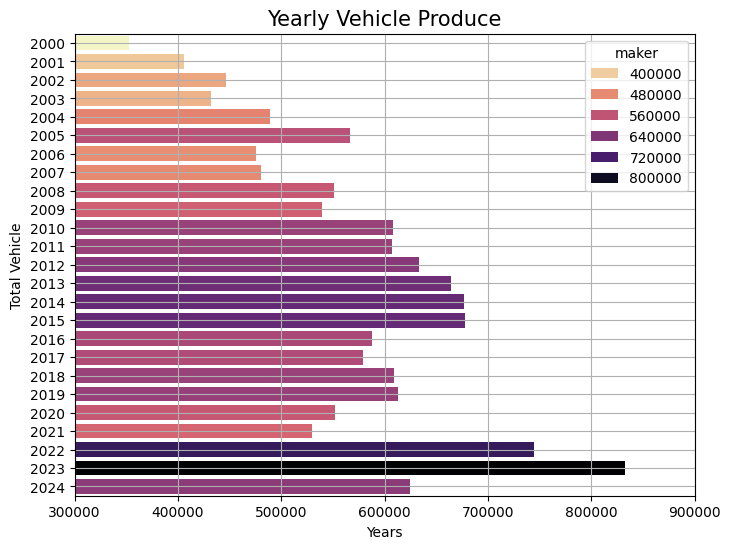

In [20]:
# Barplot for Car Production
dfG_YCounts = df.groupby(c)[a].size().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=dfG_YCounts,
            x='maker', y='year_reg', hue='maker', palette='magma_r' )
plt.title('Yearly Vehicle Produce', fontsize=15)
plt.xlabel('Years')
plt.ylabel('Total Vehicle')
plt.xlim(3e5, 9e5)
plt.xscale('linear')
plt.grid(True)
plt.show()

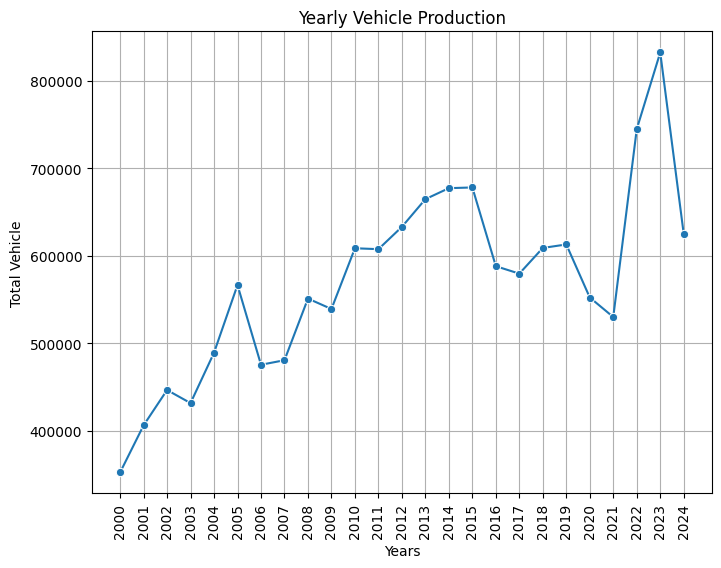

In [19]:
# Lineplot for Yearly Car Production
plt.figure(figsize=(8,6))
sns.lineplot(data=dfG_YCounts, x='year_reg', y='maker', marker='o')
plt.title('Yearly Vehicle Production')
plt.xlabel('Years')
plt.ylabel('Total Vehicle')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


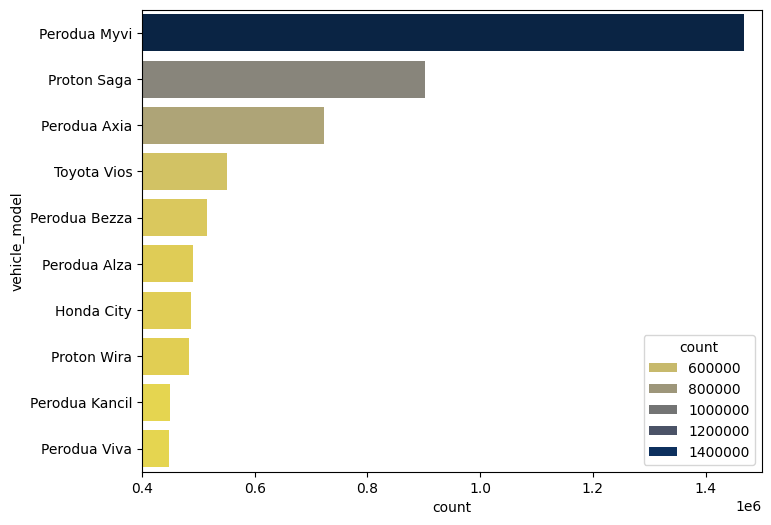

In [65]:
# Barplot for 10 Popular Car Model
plt.figure(figsize=(8,6))
df10CM = df.vehicle_model.value_counts().reset_index()[:10]
sns.barplot(data=df10CM, x='count', y='vehicle_model', hue='count', palette='cividis_r')
plt.xlim(400000,1500000)
plt.show()

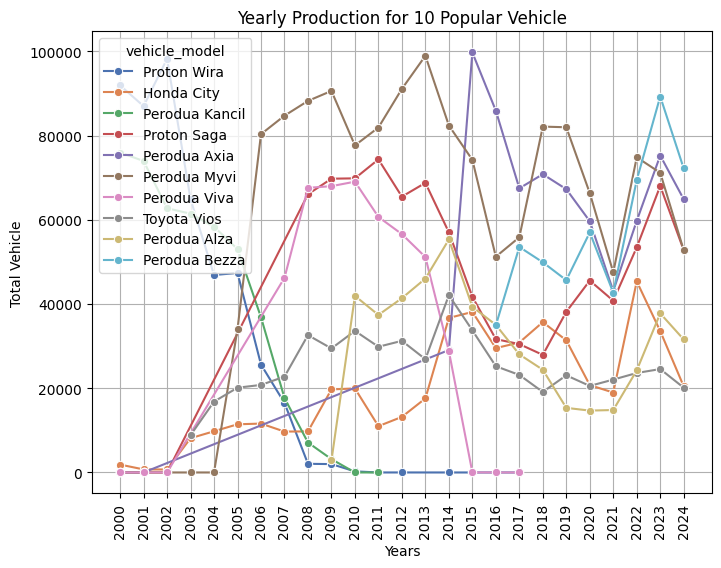

In [21]:
# Lineplot for 10 popular car yearly production
top10CM = 'Perodua Myvi|Proton Saga|Perodua Axia|Toyota Vios|Perodua Bezza|Perodua Alza|Honda City|Proton Wira|Perodua Kancil|Perodua Viva'
top10CM_filter = df[df['vehicle_model'].str.contains(top10CM)]
df_top10CM = top10CM_filter[['year_reg','vehicle_model']].value_counts().reset_index().sort_values(by='year_reg', ascending=True)
plt.figure(figsize=(8,6))
sns.lineplot(data=df_top10CM,
             x='year_reg', y='count', hue='vehicle_model',
             marker='o', palette='deep')
plt.title('Yearly Production for 10 Popular Vehicle')
plt.xlabel('Years')
plt.ylabel('Total Vehicle')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


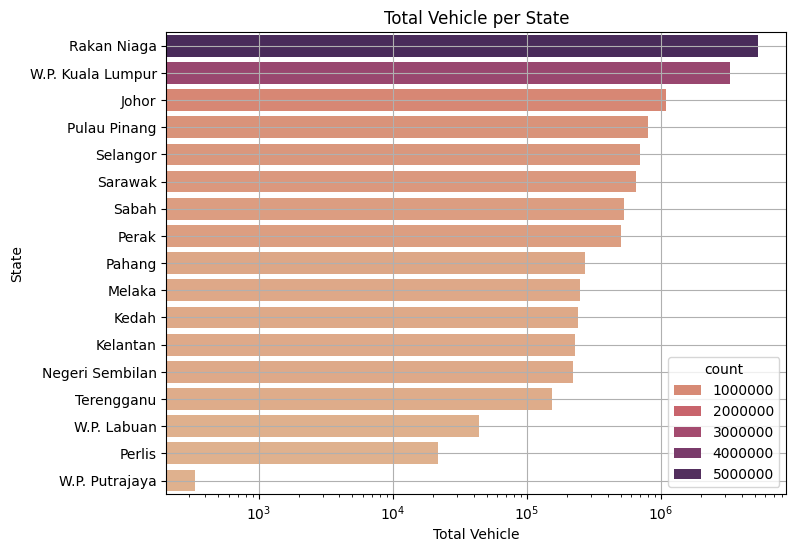

In [ ]:
# Barplot for States with Most Car Registered over Time
dfG_SSum = df.groupby(b)[b].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=dfG_SSum, x='count', y='state',hue='count' , palette='flare')
plt.title('Total Vehicle per State')
plt.xlabel('Total Vehicle')
plt.ylabel('State')
plt.xscale('log')

plt.grid(True)
plt.show()

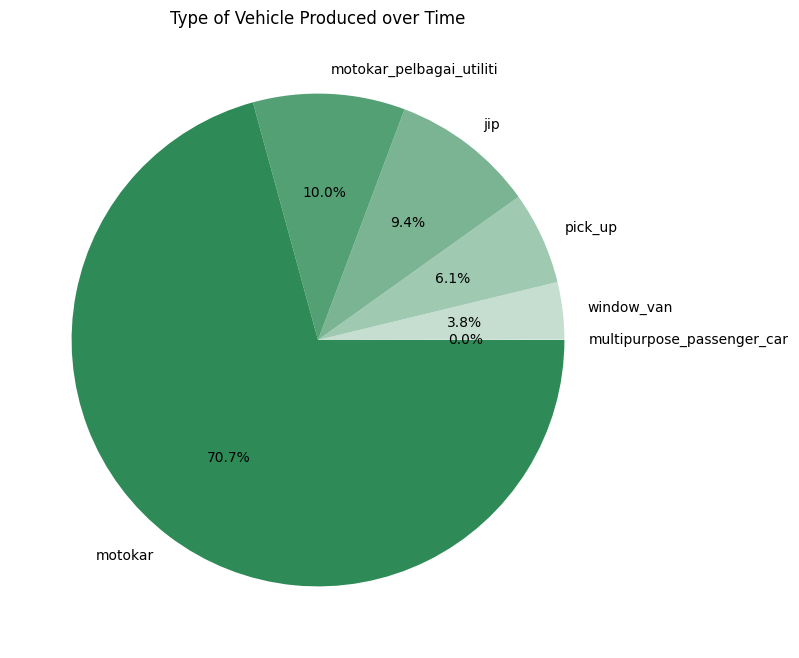

In [ ]:
# Piechart for Car Type Produced
dfG_typesum = df.groupby('type')['type'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 8))
plt.pie(data=dfG_typesum, x=dfG_typesum.values,
        labels=dfG_typesum.index, autopct='%1.1f%%',
        startangle=0, colors=sns.light_palette('seagreen'))
plt.title('Type of Vehicle Produced over Time')
plt.show()

In [ ]:
top5state = df.groupby('state')['state'].value_counts().sort_values(ascending=False) [:5]
top5state = top5state.index.tolist()
top5model = df.groupby('vehicle_model')['vehicle_model'].value_counts().sort_values(ascending=False) [:5]
top5model = top5model.index.tolist()

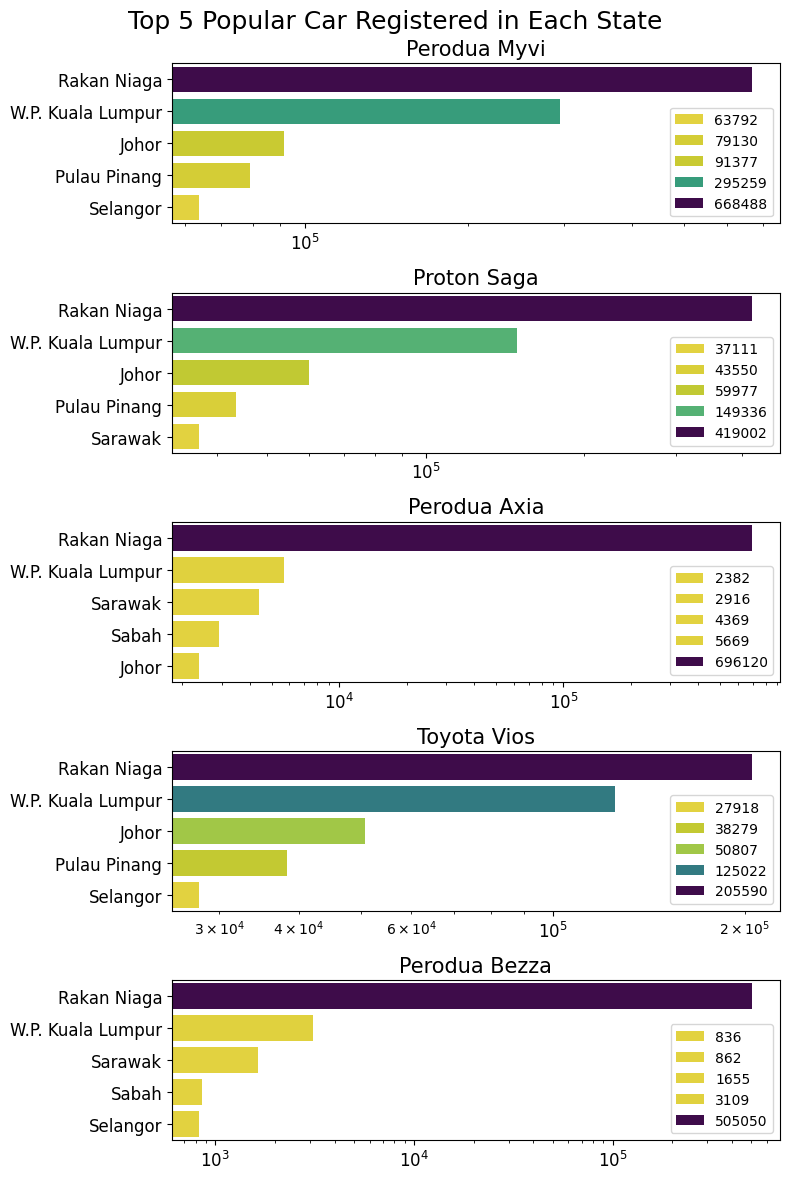

In [197]:
# Subplot for
dfG_SV = df.groupby(['state','vehicle_model'])['vehicle_model'].value_counts().reset_index().sort_values(by='count', ascending=False)

fig, ax = plt.subplots(len(top5model), 1, figsize=(8,12))
for i, title in enumerate(top5model):
  top5model_filter = dfG_SV[dfG_SV['vehicle_model']==title].sort_values(by='count' ,ascending=False)  [:5]
  sns.barplot(data=top5model_filter, x='count' ,y='state',
              ax=ax[i], hue='count', palette='viridis_r')
  ax[i].set_title(title, fontsize=15)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  # ax[i].set_xlim(0,700000)
  ax[i].tick_params(axis='both', labelsize=12)
  ax[i].legend()
  ax[i].set_xscale('log')

fig.suptitle('Top 5 Popular Car Registered in Each State', fontsize=18)
fig.tight_layout ()
plt.show()

#### Prediction

In [35]:
dfG_MSum = df.groupby([c,d])[a].size().reset_index()
dfG_MSum[dfG_MSum['year_reg']=='2024']

,year_reg,month_reg,maker
288,2024,2024-01,70186
289,2024,2024-02,66935
290,2024,2024-03,75067
291,2024,2024-04,63527
292,2024,2024-05,73901
293,2024,2024-06,61208
294,2024,2024-07,77027
295,2024,2024-08,76075
296,2024,2024-09,61075


<Axes: xlabel='month_reg', ylabel='maker'>

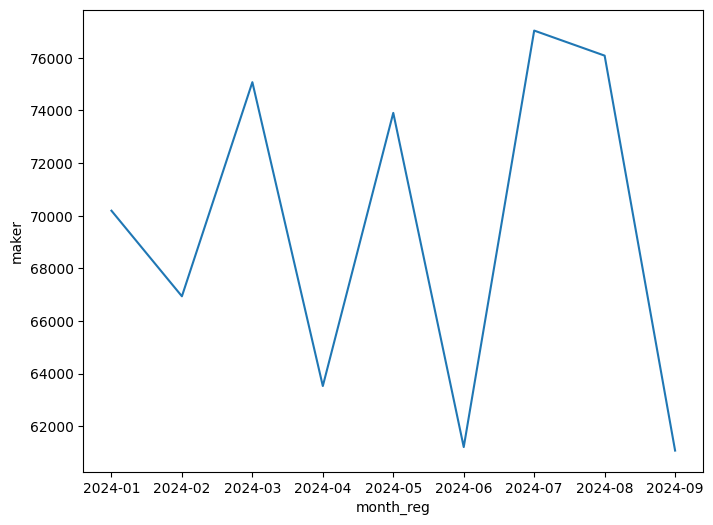

In [180]:
plt.figure(figsize=(8,6))
sns.lineplot(data=dfG_MSum[dfG_MSum['year_reg']=='2024'],
             x='month_reg', y='maker')

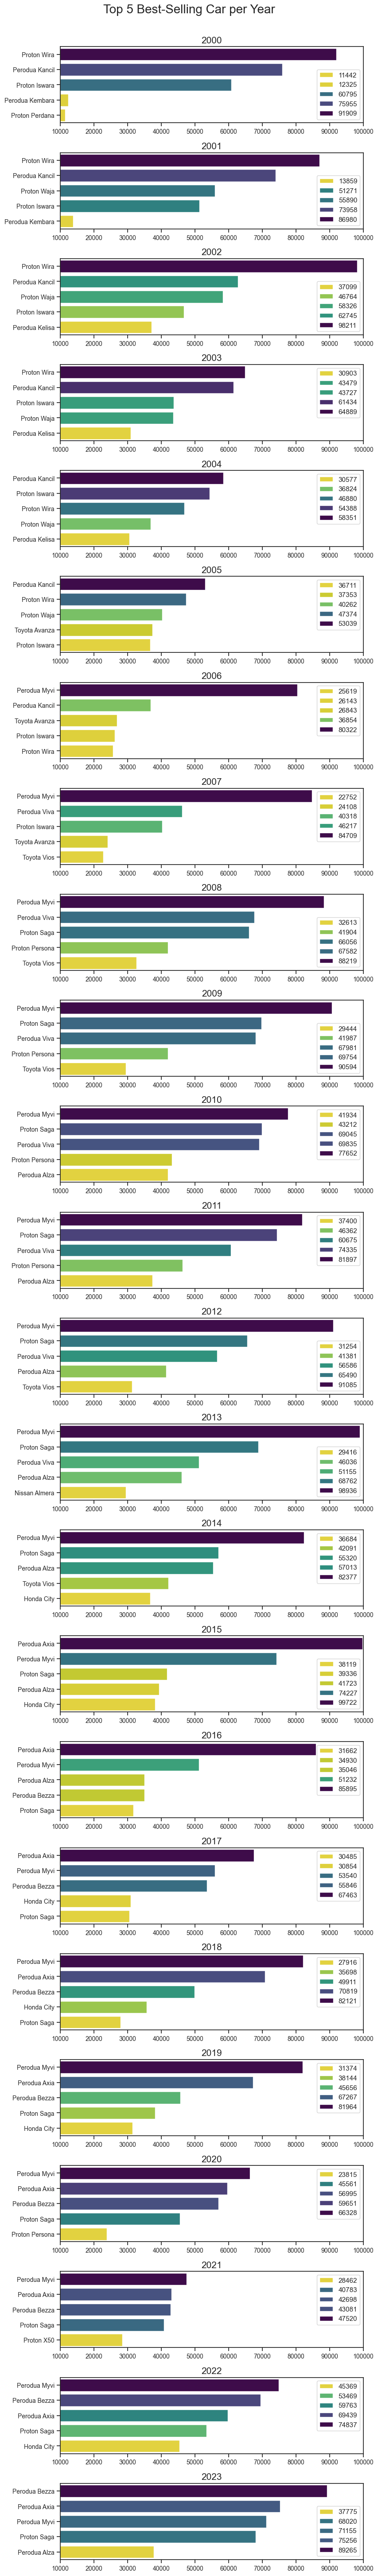

In [28]:
fig, ax = plt.subplots(len(df_Y), 1)
sns.set_theme(style='ticks',rc={'figure.figsize':(10,60)})
for i,title in enumerate(df_Y):
  sns.barplot(data=dfG_YmVM[dfG_YmVM['year_reg']==title][:5], ax=ax[i], x='count', y='vehicle_model', hue='count', palette='viridis_r')
  ax[i].set_title(title, fontsize=15)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].tick_params(axis='both', labelsize=10)
  ax[i].set_xlim(10000,100000) # make the scales same
  ax[i].legend()

fig.suptitle('Top 5 Best-Selling Car per Year', fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1)
plt.show()

In [ ]:
sum_dfG_YmVM = dfG_YmVM.pivot(index='vehicle_model', columns='year_reg', values='count').fillna(0)
sum_dfG_YmVM['sum'] = sum_dfG_YmVM.sum(axis=1)
sum_dfG_YmVM = sum_dfG_YmVM.sort_values(by='sum', ascending=False)

In [ ]:
sum_dfG_YmVM.drop(columns=['sum'], inplace=True)
sum_dfG_YmVM

year_reg,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
vehicle_model,,,,,,,,,,,,,,,,,,,,,
Perodua Myvi,5.0,5.0,2.0,2.0,2.0,34050.0,80322.0,84709.0,88219.0,90594.0,...,82377.0,74227.0,51232.0,55846.0,82121.0,81964.0,66328.0,47520.0,74837.0,71155.0
Proton Saga,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,66056.0,69754.0,...,57013.0,41723.0,31662.0,30485.0,27916.0,38144.0,45561.0,40783.0,53469.0,68020.0
Perodua Axia,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29070.0,99722.0,85895.0,67463.0,70819.0,67267.0,59651.0,43081.0,59763.0,75256.0
Toyota Vios,0.0,0.0,0.0,8853.0,16824.0,20128.0,20785.0,22752.0,32613.0,29444.0,...,42091.0,33749.0,25224.0,23158.0,19119.0,23063.0,20549.0,22052.0,23622.0,24553.0
Proton Wira,91909.0,86980.0,98211.0,64889.0,46880.0,47374.0,25619.0,16508.0,2056.0,1990.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subaru R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Infiniti FX S51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Infiniti FX30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# sum_dfG_YmVM

pd.DataFrame(sum_dfG_YmVM).to_excel('vehicle_reg.xlsx')